<div class="alert alert-info">
<h2>ASI Assignment Submission</h2>
<h2>DEKA, reepjyoti</h2>
<h3> Data setup: </h3>
<h3> MNIST dataset files should be placed in the respective folders present in the same directory as the ipython notebook </h3><br/>
path for MNIST : MNIST/ <br/>
path for CIFAR: CIFAR/

verification:
</div>


In [1]:
ls ./MNIST/

t10k-images.idx3-ubyte  train-images.idx3-ubyte
t10k-labels.idx1-ubyte  train-labels.idx1-ubyte


In [102]:
ls ./CIFAR/

batches.meta  data_batch_2  data_batch_4  readme.html
data_batch_1  data_batch_3  data_batch_5  test_batch


In [2]:
import os
import numpy as np

In [3]:
MNISTDataFolder = "./MNIST/"

#Training MNIST Images
trainingMNIST_imgFile = os.path.join(MNISTDataFolder, 'train-images.idx3-ubyte')
#Training MNIST Labels
trainingMNIST_lblFile = os.path.join(MNISTDataFolder, 'train-labels.idx1-ubyte')
#Test MNIST Images
testMNIST_imgFile = os.path.join(MNISTDataFolder, 't10k-images.idx3-ubyte')
#Test MNIST Labels
testMNIST_lblFile = os.path.join(MNISTDataFolder, 't10k-labels.idx1-ubyte')

### Loading the MNIST data


In [4]:
from struct import unpack

def loadMNISTDataFromFiles(imgFile, lblFile):
    #reading binary data 
    imgs = open(imgFile,'rb')
    lbls = open(lblFile,'rb')

    # FOR THE IMAGE FILE

    #0000 magic number 
    #0004 no. of images 
    #0008 no. of rows
    #0012 no. of columns
   
    # To get big endian unsigned int,
    # we need to pass '>I' as an argument
    

    # skiping the magic_number
    imgs.read(4)  
    # getting the total number of images
    number_of_images = imgs.read(4)
    number_of_images = unpack('>I', number_of_images)[0]

    # getting the total number of rows
    rows = imgs.read(4)
    rows = unpack('>I', rows)[0]

    # getting the total number of columns
    cols = imgs.read(4)
    cols = unpack('>I', cols)[0]


    # FOR THE LABEL FILE

    #0000 magic number 
    #0004 no. of labels 

    # skiping the magic_number
    lbls.read(4)  
    # getting the total number of labels
    number_of_labels = lbls.read(4)
    number_of_labels = unpack('>I', number_of_labels)[0]

    if(number_of_images != number_of_labels):
        raise Exception('The number of labels and the number of images do not match.')

    #0016, 0017, 0018 ... in Img File - pixel values 
    #0009, 0010, 0011 ... in Label File - labels
    
    # Initialize numpy array x and y
    x = np.zeros((number_of_images, rows, cols), dtype=np.float32)  
    y = np.zeros((number_of_labels, 1), dtype=np.uint8)  
    for i in range(number_of_images):
        for row in range(rows):
            for col in range(cols):
                # Iterating a single byte in one loop
                tmp_pixel = imgs.read(1)
                # To get big endian unsigned byte,
                # we need to pass '>B' as an argument
                tmp_pixel = unpack('>B', tmp_pixel)[0]
                x[i][row][col] = (float(tmp_pixel) / 255)
        tmp_label = lbls.read(1)
        y[i] = unpack('>B', tmp_label)[0]
    # adding 1 to the count in the confirmation msg as i starts from 0
    print(str(i+1)+" items loaded")
    data = {'x': x, 'y': y, 'rows': rows, 'cols': cols}
    return data

In [5]:
trnMNISTData = loadMNISTDataFromFiles(trainingMNIST_imgFile,trainingMNIST_lblFile)
testMNISTData = loadMNISTDataFromFiles(testMNIST_imgFile,testMNIST_lblFile)

60000 items loaded
10000 items loaded


<div class="alert alert-info">Lets see how the first image in the MNIST traning set look like.
</div>

In [265]:
trnMNISTData['x'].shape

(60000, 28, 28)

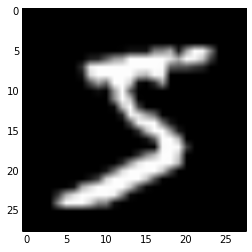

In [68]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.imshow(trnMNISTData['x'][0], cmap= "gray")
plt.show()

<div class="alert alert-info">



We see a variation of 5 on the image.<br/>
Lets check whether our assumtion is correct.


</div>

In [69]:
if (trnMNISTData['y'][0] == [5]):
    print("Yes! It is 5")
else:
    print("Nope. it isn't 5")

Yes! It is 5


<div class="alert alert-info">

It's confirmed that the training data's label is set as 5 as we suspected.
<br/>
Hoping the MNIST data is correctly extracted, let us unpack the CIFAR data.
</div>


### Loading the CIFAR data

In [70]:
CIFARDataFolder = "./CIFAR/"

#Meta data of CIFAR
metaCIFARData = os.path.join(CIFARDataFolder, 'batches.meta')
#Training data of CIFAR
trainingCIFARData1 = os.path.join(CIFARDataFolder, 'data_batch_1')
trainingCIFARData2 = os.path.join(CIFARDataFolder, 'data_batch_2')
trainingCIFARData3 = os.path.join(CIFARDataFolder, 'data_batch_3')
trainingCIFARData4 = os.path.join(CIFARDataFolder, 'data_batch_4')
trainingCIFARData5 = os.path.join(CIFARDataFolder, 'data_batch_5')
#Test data of CIFAR
testCIFARData = os.path.join(CIFARDataFolder, 'test_batch')



import cPickle
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = cPickle.load(fo)
    return dict

In [71]:
trnCIFARData1 = unpickle(trainingCIFARData1)
trnCIFARData2 = unpickle(trainingCIFARData2)
trnCIFARData3 = unpickle(trainingCIFARData3)
trnCIFARData4 = unpickle(trainingCIFARData4)
trnCIFARData5 = unpickle(trainingCIFARData5)
testCIFARData = unpickle(testCIFARData)
metaDataCIFAR = unpickle(metaCIFARData)

In [72]:
print(trnCIFARData1['data'].shape)
print(trnCIFARData2['data'].shape)
print(trnCIFARData3['data'].shape)
print(trnCIFARData4['data'].shape)
print(trnCIFARData5['data'].shape)

(10000, 3072)
(10000, 3072)
(10000, 3072)
(10000, 3072)
(10000, 3072)


In [73]:
# since consecutive 1024 entries store color channels of 32x32 image 

def getCifarImageFromData(img_flat):
    img_R = img_flat[0:1024].reshape((32, 32))
    img_G = img_flat[1024:2048].reshape((32, 32))
    img_B = img_flat[2048:3072].reshape((32, 32))
    img = np.dstack((img_R, img_G, img_B))
    return img

<div class="alert alert-info">
Lets see how the first image in the batch1 of training set look like.</div>

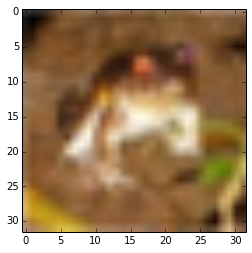

In [74]:
plt.imshow(getCifarImageFromData(trnCIFARData1['data'][0]))
plt.show()

<div class="alert alert-info">

It seems like a frog. <br/>
Lets check what is the label against it.
</div>

In [75]:
#created a function to give proper label name when numeric label is sent
def getCIFARClass(label):
    return metaDataCIFAR['label_names'][label]

<div class="alert alert-info">
Let's now check what is the label against the first image in CIFAR
</div>

In [76]:
getCIFARClass(trnCIFARData1['labels'][0])

'frog'

<div class="alert alert-info">

This is what we assumed! <br/>Hoping the CIFAR dataset loaded correctly, let's now go into the details.
</div>

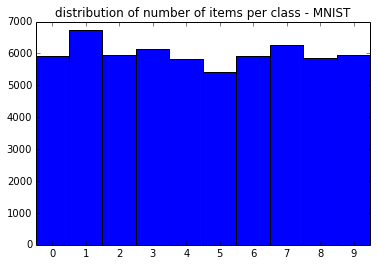

In [108]:
from collections import Counter
import matplotlib.pyplot as plt

classValues = []
for yVal in trnMNISTData['y']:
    classValues.append(yVal[0])


labels, values = zip(*Counter(sorted(classValues)).items())

indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.title('distribution of number of items per class - MNIST') 

plt.show()

In [78]:
combinedCIFARLabelList = (trnCIFARData1['labels'] \
                        + trnCIFARData2['labels'] \
                        + trnCIFARData3['labels'] \
                        + trnCIFARData4['labels'] \
                        + trnCIFARData5['labels'])

In [79]:
import itertools
combinedCIFARdata = np.vstack([trnCIFARData1['data'],\
               trnCIFARData2['data'],\
               trnCIFARData3['data'],\
               trnCIFARData4['data'],\
               trnCIFARData5['data']])
combinedCIFARLabels =  list(itertools.chain(trnCIFARData1['labels'],\
                                            trnCIFARData2['labels'],\
                                            trnCIFARData3['labels'],\
                                            trnCIFARData4['labels'],\
                                            trnCIFARData5['labels'],))

# Creating a dictionary with all the values of CIFAR dataset combined.
combinedCIFARdataset = {'x_values': combinedCIFARdata, 'y_values': combinedCIFARLabels}

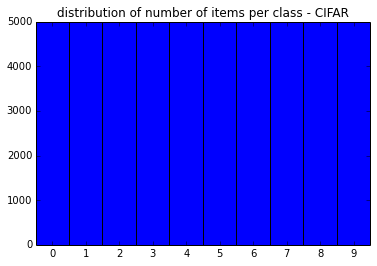

In [107]:
from collections import Counter
import matplotlib.pyplot as plt


labels, values = zip(*Counter(sorted(combinedCIFARLabelList)).items())

indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.title('distribution of number of items per class - CIFAR') 

plt.show()

In [86]:
def getFlattendedMNISTData_X(data):
    dataMNISTFlattened_X = []
    for i in range(len(data['x'])):
        dataMNISTFlattened_X.append(data['x'][i].flatten())
    return dataMNISTFlattened_X

<div class="alert alert-info">

Among the datasets, CIFAR set is equally distributed among it's classes. Each class can be been trained with the same number of items. This is a fair training set. The MNIST data set can also be considered to be equally distributed among it's classes as none of the classes have been favoured or ignored while preparing and every class available for training have more than 5000 items.
<br/> If it was not the case that each class is not equally distributed, we cannot consider the probabilty of each class to be 1 / total number of classes avaiable during the computation of bayes.
<br/> 
The MNIST dataset has a training set of 60,000 examples, of which each image is of the size 28x28. 
<br/> 

Each of the batch files of the CIFAR dataset contains a dictionary with the following elements:
<ul><li>data -- a 10000x3072 numpy array of uint8s. Each row of the array stores a 32x32 colour image. The first 1024 entries contain the red channel values, the next 1024 the green, and the final 1024 the blue. The image is stored in row-major order, so that the first 32 entries of the array are the red channel values of the first row of the image.</li>
<li>labels -- a list of 10000 numbers in the range 0-9. The number at index i indicates the label of the ith image in the array data.</li></ul>
<br/> 
We can consider the dimentions of the MNIST dataset to be equal to the pixel values = 28x28 = 784, the values of which determine the digit recognition. For the CIFAR, we can consider the coloured values of each pixel = 3 X 1024 = 3072 dimentions. Having more dimentions would increase the computation but would also increase the correct detection of each item. 

</div>

<div class="alert alert-info">

To implement the naive bayes model, we need to summarize the data in the training dataset. This summary is then used when making predictions. The summary of the training data collected involves the mean and the standard deviation for each attribute, by class value. For example, for MNIST, there there are 10 class values and 28x28 = 784 numerical attributes, then we need a mean and standard deviation for each attribute (784) and class value (10) combination, ie. 7840 attribute summaries.

These are required when making predictions to calculate the probability of specific attribute values belonging to each class value.We can break the preparation of this summary data down into the following sub-tasks:
<ul>
<li>Separate Data By Class</li>
<li>Calculate Mean</li>
<li>Calculate Standard Deviation</li>
<li>Summarize Dataset</li>
<li>Summarize Attributes By Class</li></ul></div>

In [87]:
def separateByClass(dataset,datasetClass):
    separated = {}
    if(datasetClass=="mnist"):
        for i in range(len(dataset['x'])):
            vector = dataset['x'][i].flatten()
            if (dataset['y'][i].item(0) not in separated):
                separated[dataset['y'][i].item(0)] = []
            separated[dataset['y'][i].item(0)].append(vector)
        return separated
    if(datasetClass=="cifar"):
        for i in range(len(dataset['x_values'])):
            vector = dataset['x_values'][i]
            if (dataset['y_values'][i] not in separated):
                separated[dataset['y_values'][i]] = []
            separated[dataset['y_values'][i]].append(vector)
        return separated


In [88]:
# testing
separatedMNIST = separateByClass(trnMNISTData,"mnist")
separatedCIFAR = separateByClass(combinedCIFARdataset,"cifar")

In [89]:
def mean(numbers):
    return sum(numbers)/float(len(numbers))
 
def stdev(numbers):
    avg = mean(numbers)
    variance = sum([pow(x-avg,2) for x in numbers])/float(len(numbers))
    return np.sqrt(variance)

In [90]:
def summarize(dataset):
    summaries = [(mean(attribute), stdev(attribute)) for attribute in zip(*dataset)]
    return summaries

In [91]:
def summarizeByClass(dataset,datasetClass):
    separated = separateByClass(dataset,datasetClass)
    summaries = {}
    for classValue, instances in separated.iteritems():
        summaries[classValue] = summarize(instances)
    return summaries

<div class="alert alert-info">
We are now ready to make predictions using the summaries prepared from our training data. <ul><br/>
Making predictions involves:
<br/>1. calculating the probability that a given data instance belongs to each class, 
<br/>2. then selecting the class with the largest probability as the prediction.<ul>
<li>Calculate Gaussian Probability Density Function
</li>
<li>Calculate Class Probabilities
</li>
<li>Make a Prediction
</li>
<li>Estimate Accuracy</li></ul></div>



In [92]:
def calculateProbability(x, mean, stdev):
    if stdev == 0:
        return 0
    exponent = np.exp(-(np.power(x-mean,2)/(2*np.power(stdev,2))))
    return (1 / (np.sqrt(2*np.pi) * stdev)) * exponent

In [93]:
def calculateClassProbabilities(summaries, inputVector):
    probabilities = {}
    for classValue, classSummaries in summaries.iteritems():
        probabilities[classValue] = 1
        for i in range(len(classSummaries)):
            mean, stdev = classSummaries[i]
            x = inputVector[i]
            prob = calculateProbability(x, mean, stdev)
            if(prob != 0):
                probabilities[classValue] *= prob
    return probabilities

In [94]:
def predict(summaries, inputVector):
    probabilities = calculateClassProbabilities(summaries, inputVector)
    #print(probabilities)
    bestLabel, bestProb = None, -1
    for classValue, probability in probabilities.iteritems():
        if bestLabel is None or probability > bestProb:
            #print bestLabel
            #print probability
            bestProb = probability
            bestLabel = classValue
    return bestLabel

In [95]:
def getPredictions(summaries, testSet,datasetClass ):
    if(datasetClass=="mnist"):
        testSet = getFlattendedMNISTData_X(testSet)
    if(datasetClass=="cifar"):
        testSet = testSet['data']
    
    predictions = []

    for i in range(len(testSet)):
        result = predict(summaries, testSet[i])
        predictions.append(result)

    return predictions

In [96]:
summariesMNIST = summarizeByClass(trnMNISTData,"mnist")
predictionsMNIST = getPredictions(summariesMNIST,testMNISTData,"mnist")

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


In [97]:
summariesCIFAR = summarizeByClass(combinedCIFARdataset,"cifar")
predictionsCIFAR = getPredictions(summariesCIFAR,testCIFARData,"cifar")

In [98]:
actualMNIST = []
for y in testMNISTData['y']:
    actualMNIST = np.append(actualMNIST,y.item(0))

predictedMNIST = np.array(predictionsMNIST)


actualCIFAR = testCIFARData['labels']
predictedCIFAR = np.array(predictionsCIFAR)



In [99]:
# Calculating the accuracy
def getAccuracy(actual,predicted):
    return (actual == predicted).sum() / float(len(actual))* 100.0

In [100]:
def confMatrix(actual,predicted):
# calculating the confusion matrix; 10 as there are 10 classes
    confusionMatrix = np.zeros((10, 10))
    for a, p in zip(actual, predicted):
        confusionMatrix[a][p] += 1
    return confusionMatrix

In [101]:
print("Accuracy percentage using Naive Bayesian classifier for MNIST test dataset",\
      getAccuracy(actualMNIST,predictedMNIST))
print("Accuracy percentage using Naive Bayesian classifier for MNIST test dataset",\
      getAccuracy(actualCIFAR,predictedCIFAR))

('Accuracy percentage using Naive Bayesian classifier for MNIST test dataset', 78.049999999999997)
('Accuracy percentage using Naive Bayesian classifier for MNIST test dataset', 10.0)


In [306]:
# Accuracy when random selection of classes are done
print("Accuracy percentage while selecting random classes for MNIST test dataset",\
      getAccuracy(actualMNIST,np.random.randint(9, size=len(actualMNIST))))
print("Accuracy percentage while selecting random classes for CIFAR test dataset",\
      getAccuracy(actualCIFAR,np.random.randint(9, size=len(actualMNIST))))


('Accuracy percentage while selecting random classes for MNIST test dataset', 9.8200000000000003)
('Accuracy percentage while selecting random classes for CIFAR test dataset', 9.2599999999999998)


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  """


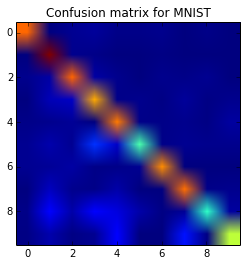

In [103]:
cmMNIST = confMatrix(actualMNIST,predictedMNIST)
plt.imshow(cmMNIST)
plt.title('Confusion matrix for MNIST') 

plt.show()

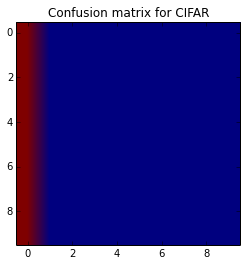

In [104]:
cmCIFAR= confMatrix(actualCIFAR,predictedCIFAR)
plt.imshow(cmCIFAR)
plt.title('Confusion matrix for CIFAR') 

plt.show()

<div class="alert alert-info">
Positive feature of the classifier: When assumption of independence holds, a Naive Bayes classifier performs better compare to other models like logistic regression and you need less training data.
One negative feature would be that if the  variable has a category (in test data set), which was not observed in training data set, then model will assign a 0 (zero) probability and will be unable to make a prediction. Another limitation of Naive Bayes is the assumption of independent predictors. Ideally for detection, classifiers with feature detection such as HAAR classifier or HOG classifier would be performing better as in real life, features of an item are very commonly dependent.
<br/><br/>
One preprocessing step that can be applied is removal of the border pixels for faster computation in the case of the MNIST digits.
<br/><br/>
We see that the accuracy against MNIST is high and fairs much better than randomly selecting a class. However, CIFAR test images doesn't get classified nicely with the naive bayes classifier. This might be due to the reason that average colour of the images remain the same and any random coloured image can be compared and thought to be relating to a category someway or the other. This intuitive reasoning also goes along with the  placement of the test images in to the incorrect classes.
<br/><br/>We can improve the performance by adding more features such as combination of the existing features as naive bayes classifier considers features to be independent even though most of the time they are not.
</div>

### Bayesian linear regression

<div class="alert alert-info">
Lets see how the test data fairs against the bayesian linear regression. In the last section, I received  RuntimeWarning while doing calculations (involving exponentials) in for loops, it took a long time to train the model. Here let's take the advantage of the matrix calculations provided by numpy. We are doing a similar preprocessing as before but this time converting the variables into numpy array so that we can compute the functions faster.
</div>

In [10]:
trnDataMNISTFlattened_X = np.asarray(getFlattendedMNISTData_X(trnMNISTData))
testDataMNISTFlattened_X = np.asarray(getFlattendedMNISTData_X(testMNISTData))

In [17]:
def trainLinearRegression(data, labels,K, dataClass):

    if(dataClass=='mnist'):
        X = np.ones((len(trnDataMNISTFlattened_X), 1+len(trnDataMNISTFlattened_X[0]*K)))
    
        for k in range(1,K):
            X[:,  1+len(trnDataMNISTFlattened_X[0])*(k-1)  :  1+len(trnDataMNISTFlattened_X[0])*k] \
                    = np.power(trnDataMNISTFlattened_X, k)
        w_hat = np.dot(np.dot(np.linalg.pinv(np.dot(X.transpose(),X)),X.transpose()),labels)
        variance = np.dot((np.dot(labels-X,w_hat)).transpose(),(np.dot(labels-X,w_hat)))\
                    /len(trnDataMNISTFlattened_X);
        
        
    if(dataClass=='cifar'):
        labels = np.asarray(labels).reshape((len(labels),1))
        X = np.ones((len(combinedCIFARdataset['x_values']), 1+len(combinedCIFARdataset['x_values'][0])*K))

        for k in range(1,K):
            X[:,  1+len(combinedCIFARdataset['x_values'][0])*(k-1)  : \
                      1+len(combinedCIFARdataset['x_values'][0]*k)] \
                = np.power(combinedCIFARdataset['x_values'],k)
        w_hat = np.dot(np.dot(np.linalg.pinv(np.dot(X.transpose(),X)),X.transpose()),labels)

        variance = np.dot(np.dot(labels-X,w_hat).transpose(),np.dot(labels-X,w_hat))\
                    /len(combinedCIFARdataset['x_values'])
    return w_hat, variance

In [18]:
regressionModelValuesMNIST = trainLinearRegression(trnDataMNISTFlattened_X,trnMNISTData['y'], 2, 'mnist' )
regressionModelValuesCIFAR = trainLinearRegression(combinedCIFARdataset['x_values'],\
                                                   combinedCIFARdataset['y_values'], 2, 'cifar' )

In [19]:
def predictLinearReg(data_test, labels_test, w_hat,variance, K, dataClass):
    
    if(dataClass=='mnist'):
        X_test = np.ones((len(testDataMNISTFlattened_X), 1+len(testDataMNISTFlattened_X[0]*K)))
        
        for k in range(1,K):
            X_test[:,  1+len(testDataMNISTFlattened_X[0])*(k-1)  :  1+len(testDataMNISTFlattened_X[0])*k] \
                    = np.power(testDataMNISTFlattened_X, k)
        if variance == 0:
            noise = np.zeros(len(testDataMNISTFlattened_X),1)
        else:
            noise = np.random.normal(0,np.sqrt(variance),(len(testDataMNISTFlattened_X),1))
        
        predictions = np.round(np.dot(X_test,w_hat) + noise)
    
    if(dataClass=='cifar'):
        X_test = np.ones((len(data_test), 1+len(data_test[0])*K))
        
        for k in range(1,K):
            X_test[:,  1+len(data_test[0])*(k-1)  :  1+len(data_test[0])*k] \
                    = np.power(data_test, k)
        if variance == 0:
            noise = np.zeros(len(data_test),1)
        else:
            noise = np.random.normal(0,np.sqrt(variance),(len(data_test),1))
        
        predictions = np.round(np.dot(X_test,w_hat) + noise)
        
    for i,p in enumerate(predictions):
        if p > 9:
            predictions[i] = 9
        if p < 0:
            predictions[i] = 0
    
    max_label = np.ndarray.max(labels_test)
    min_label = np.ndarray.min((labels_test);
    predictions(predictions>max_label)= max_label; 
    predictions(predictions<min_label)= min_label;
    
    return predictions

In [20]:
predictionsLinearRegMNIST = predictLinearReg(testMNISTData['x'],testMNISTData['y'],\
                                             regressionModelValuesMNIST[0],regressionModelValuesMNIST[1],2,'mnist')

In [21]:
predictionsLinearRegCIFAR = predictLinearReg(testCIFARData['data'],testCIFARData['labels'],\
                                             regressionModelValuesCIFAR[0],regressionModelValuesCIFAR[1],2,'cifar')

In [32]:
# Calculating the accuracy
def getAccuracyLinReg(actual,predicted):
    return np.sum(actual == predicted)/ float(len(actual))

In [50]:
actualMNISTLinReg = []
for y in testMNISTData['y']:
    actualMNISTLinReg = np.append(actualMNISTLinReg,y.item(0))

predictedMNISTLinReg = np.array(predictionsLinearRegMNIST)
actualCIFARLinReg = testCIFARData['labels']

print("Accuracy - MNIST - LinReg", getAccuracyLinReg(actualMNISTLinReg\
                                                     .reshape((len(actualMNISTLinReg),1)),predictedMNISTLinReg))

print("Accuracy - CIFAR - LinReg",getAccuracyLinReg(np.asarray(actualCIFARLinReg)\
                                                    .reshape((len(actualCIFARLinReg),1))\
                                                    ,predictionsLinearRegCIFAR))


('Accuracy - MNIST - LinReg', 9.8300000000000001)
('Accuracy - CIFAR - LinReg', 10.440000000000001)


In [51]:
def confMatrixLinReg(actual,predicted):
# calculating the confusion matrix; 10 as there are 10 classes
    confusionMatrix = np.zeros((10, 10))
    for a, p in zip(actual, predicted):
        confusionMatrix[a][p.item(0)] += 1
    return confusionMatrix

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  """


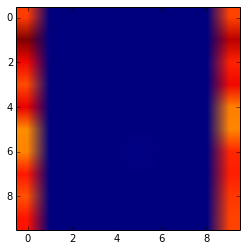

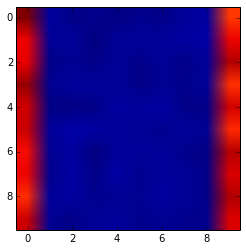

In [81]:
cmMNISTBLinReg = confMatrix(actualMNISTLinReg, predictedMNISTLinReg.tolist())

plt.imshow(cmMNISTBLinReg)
plt.show()

cmCIFARBLinReg = confMatrix(actualCIFARLinReg, predictionsLinearRegCIFAR.tolist())
plt.imshow(cmCIFARBLinReg)
plt.show()

In [113]:
len(actualMNISTLinReg)

10000

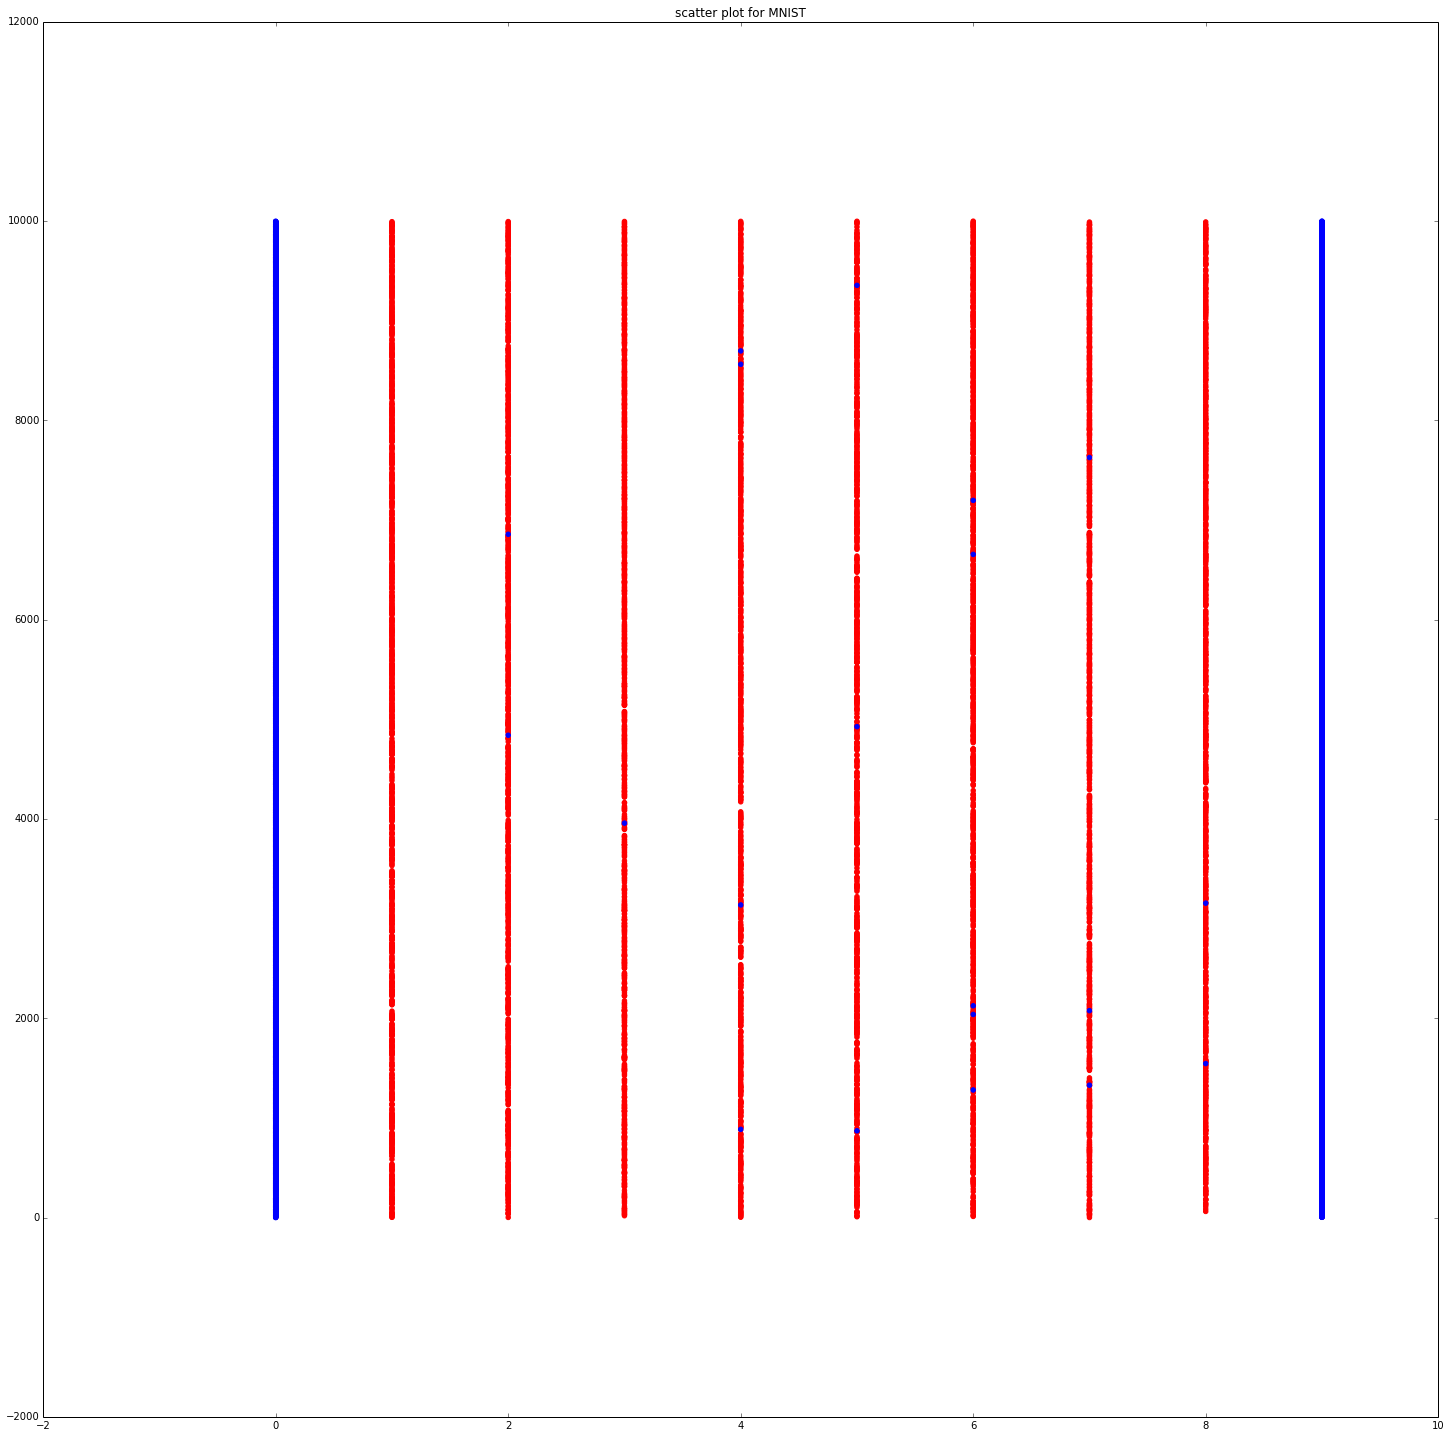

In [121]:
plt.figure(figsize=(25,25))
plt.scatter(actualMNISTLinReg,range(len(actualMNISTLinReg)), color='red')
plt.scatter(predictedMNISTLinReg,range(len(actualMNISTLinReg)),  color='blue')

plt.title('scatter plot for MNIST') 
plt.show()



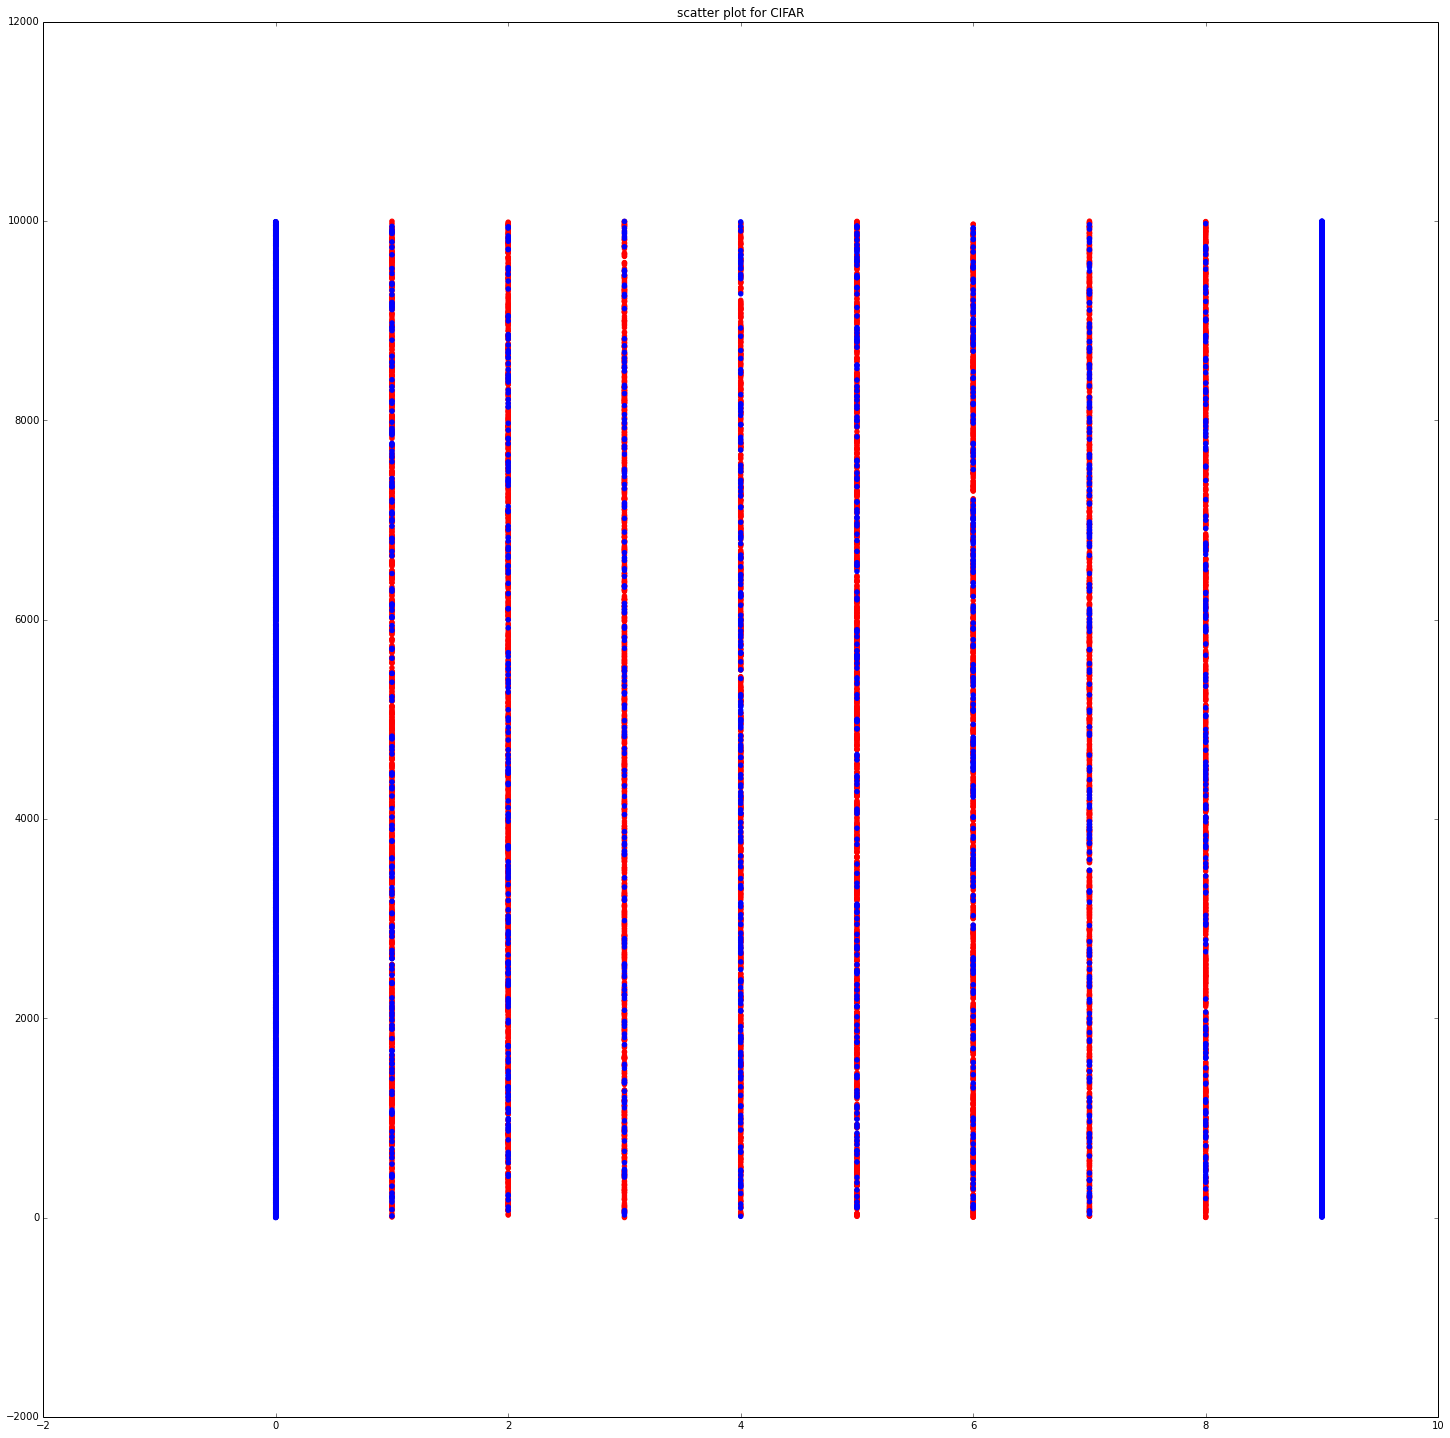

In [122]:
plt.figure(figsize=(25,25))
plt.scatter(actualCIFARLinReg,range(len(actualMNISTLinReg)), color='red')
plt.scatter(predictionsLinearRegCIFAR,range(len(actualMNISTLinReg)),  color='blue')

plt.title('scatter plot for CIFAR') 
plt.show()


<div class="alert alert-info">
We see that the error in MNIST and CIFAR using bayesian linear regresssion is very high. The scatter plot helps us visualise the error very clearly. For MNIST, where the naive bayesian was 78% accurate, linear regression presented an accuracy of 9.8 which is really less and almost similar to choosing classes at random <br/> <br/>
Since we are treating the class labels as continuous, to discretize predictions, I have rounded the predicted values to the nearest integer value using numpy round method. Also I had put an extra condition to round off extremities to 0 or 9 depending on it's value.<br/><br/>
One assumption that we are make when we apply linear regression is that the values of the output depends on the values of the input parameters. This is not the case here. The output depends on the image features and how the pixels are distributed in the image. Numerical categorisation of the labels (0,1,2...etc against cars, cats, airplanes.... etc) are given just for the readability rather than to choose the category by the output value from the model.

</div>